In [1]:
#!pip install -U transformers --quiet

In [2]:
import transformers
transformers.__version__

'4.37.2'

In [3]:
from model import EncoderModel, DecoderModel

In [4]:
from transformers import AutoModel, AutoTokenizer, AutoModelForCausalLM, GenerationConfig
import torch
import torch.nn.functional as F
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

# Encoder

In [6]:
model_id = "sentence-transformers/all-MiniLM-L6-v2"
encoder = EncoderModel(model_id, device)

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [7]:
sentences = ["Hello World", "Hello Mars", "Transformers are awesome"]
vectors = encoder(sentences)

In [8]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_scores = cosine_similarity(vectors)

In [9]:
similarity_scores

array([[1.0000002 , 0.5999794 , 0.1535384 ],
       [0.5999794 , 1.0000002 , 0.17221901],
       [0.1535384 , 0.17221901, 1.0000001 ]], dtype=float32)

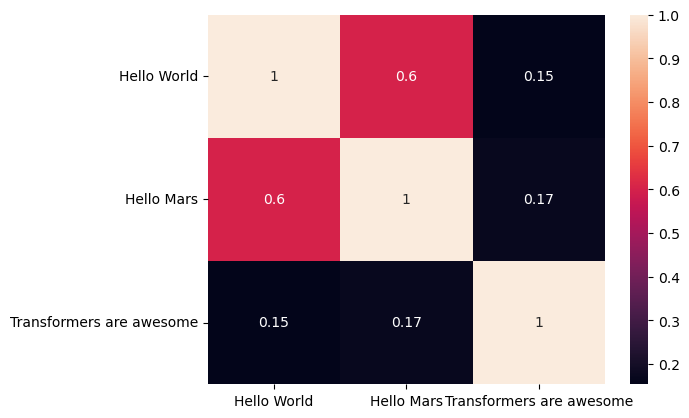

In [10]:
df_cm = pd.DataFrame(similarity_scores, index=sentences, columns=sentences)
sns.heatmap(df_cm, annot=True)
plt.show()

# Decoder

In [11]:
model_id = "HuggingFaceH4/zephyr-7b-beta"
gen_cfg = GenerationConfig.from_pretrained(model_id)
gen_cfg

GenerationConfig {
  "bos_token_id": 1,
  "eos_token_id": 2
}

In [12]:
tokenizer = AutoTokenizer.from_pretrained(model_id)
tokenizer.pad_token_id

2

In [13]:
model_id = "HuggingFaceH4/zephyr-7b-beta"
causal_lm = DecoderModel(model_id, device="cuda:0", torch_dtype=torch.bfloat16)

Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

In [14]:
pprint(causal_lm(question="How are you doing?", context="I am doing good."))

('Based on the context provided, the person being asked is doing well. '
 'Therefore, the appropriate response would be:\n'
 '\n'
 'You are doing well, thank you for asking. Alternatively, you could ask the '
 'person for more details about how they are doing')
